0 Clustering: The K-means Clustering
-------------------
In this section, .

In [2]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create artificial dataset containing 350 2-dimensional data points
points = np.vstack(((np.random.randn(150, 2) * 0.7 + np.array([2, 0])),
                  (np.random.randn(100, 2) * 0.3 + np.array([-0.5, 1.0])),
                  (np.random.randn(100, 2) * 0.5 + np.array([0.0, -1.0]))))

plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([2, 0]), 0.7/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 1.0]), 0.3/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([0.0, -1.0]), 0.5/2, fill=False, lw=2))
plt.title('Data')
plt.legend()

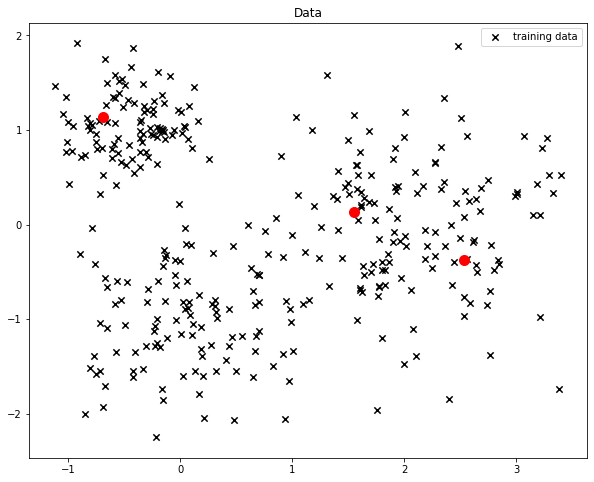

In [2]:
# During K-means clustering, you need to initialize some random centroids by using existing data points.

# First, you need to identify the number of centroids: k.
k = 3

# Then, choose k data points randomly as the initial centroids.
centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]  # And choose the first k data points in the shuffled dataset as initialized centroids.

# You can also plot and visualize the initialization
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# Try to run this section of code for few more times to see the randomization.

In [3]:
# Clustering: assign each data points to its closest centroid

# First, you need to compute the distance between each point and each centroid.
# Thus, for each of the data points you will have three distances to the three initialized centroids.
distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))

# Now, for each of the data points, find the index of the closest centroid, pleast print it out and see how they look like.
closest_ind = np.argmin(distances, axis=0)

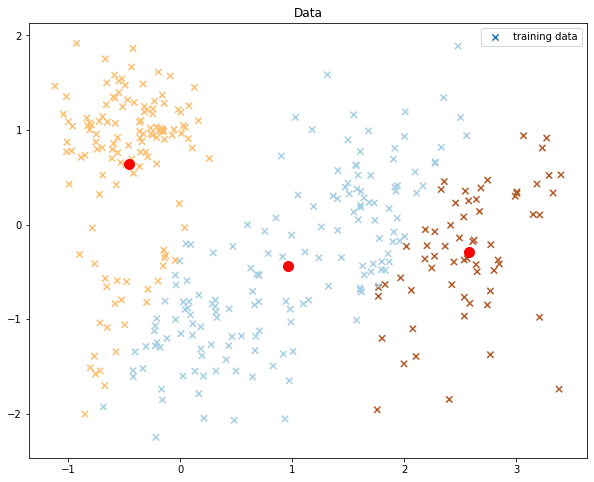

In [4]:
# Once you have assigned the data points into their closest centroids, you have your first clusters.
# What you need to do is updating the random centroids to the center/mean of the new clusters.

centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])

# You can visualize the updated centroids. Do you see the difference?
plt.figure(figsize=(10,8))
# You can also try to color the data points by their centroid/cluster index
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# You can simply run and re-run this few lines of codes including distance computation and centroids update to see how centroids can be continuously updated.

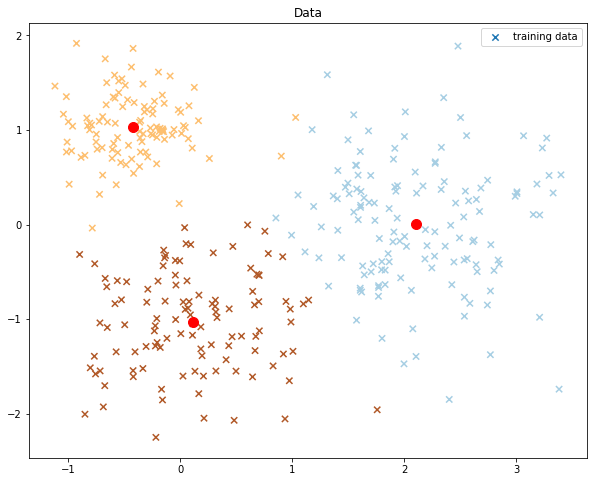

In [5]:
# We can also wrap these few lines of code in a 'for loop' to see if how centroids converge in few iterations.

centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]

iterations = 5
for i in range(iterations):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    closest_ind = np.argmin(distances, axis=0)
    centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])
    
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

In [6]:
# Let's try to wrap-up all the codes into functions

In [7]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

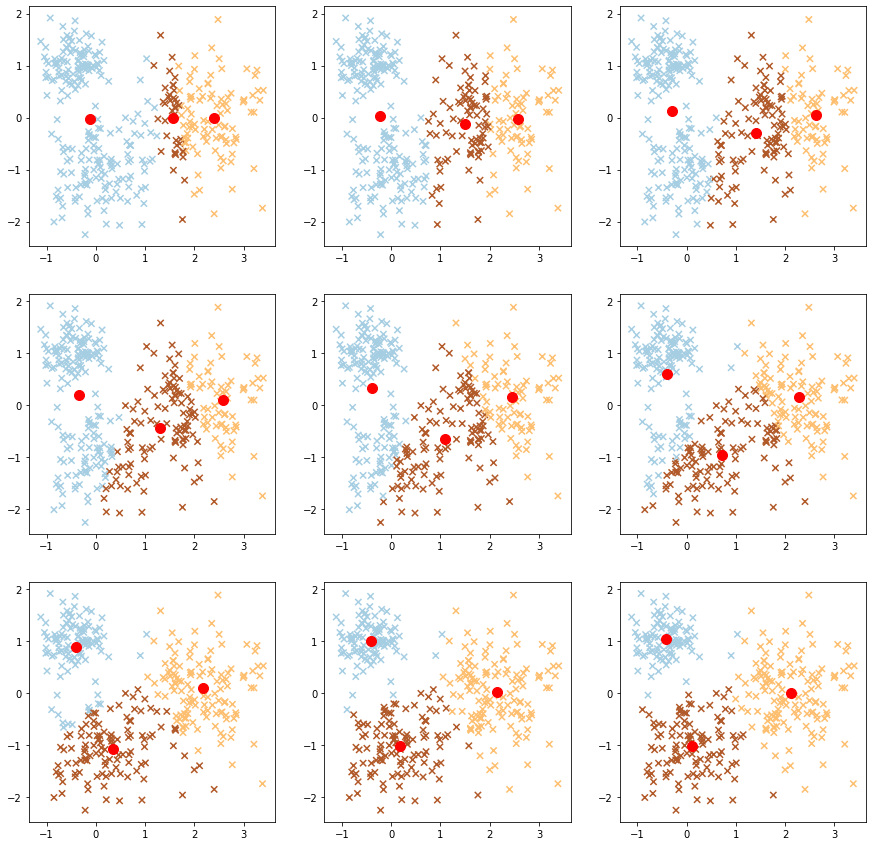

In [8]:
# Try to call your function, and inspect how centroids are updated.
centroids = initialize_centroids(points, 3)

fig = plt.figure(figsize=(15,15))
for i in range(9):
    closest_ind = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest_ind, centroids)
    plt.subplot(3, 3, i+1)
    plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    

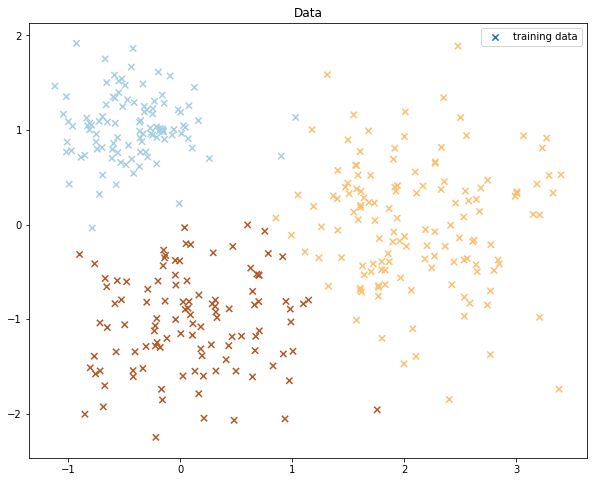

In [9]:
# In fact, today, you don't have to implement the K-means by yourself.
# The 'sklearn' module has already implemented the K-means for you, and you can directly use the clustering functionality by calling the functions within the module.

# Let's try the 'sklearn' on our artifical dataset.
# This code will use few modules: pathlib, Numpy, matplotlib, Scipy and sklearn
from sklearn import cluster

kmean_cluster = cluster.KMeans(n_clusters=3)  # This is a function to be fitted to the data
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='x', label='training data')
plt.title('Data')
plt.legend()

# Compare the results with those you obtained above.

In [18]:
# Now, it's time to try the K-means on real dataset!

# This code will use few modules: pathlib, Numpy, matplotlib, and sklearn
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn import cluster

# You start to collect the file names of all the *tif image files
file_list = []  # Empty list to store file names
for file in Path('data/').glob('*.npy'):
        file_list.append(file)
        
# You can print to see how the file_list looks like
print(file_list)

[WindowsPath('data/utrecht_ndvi_2015.npy'), WindowsPath('data/utrecht_ndvi_2020.npy')]


(6005001, 1)
(6005001, 2)


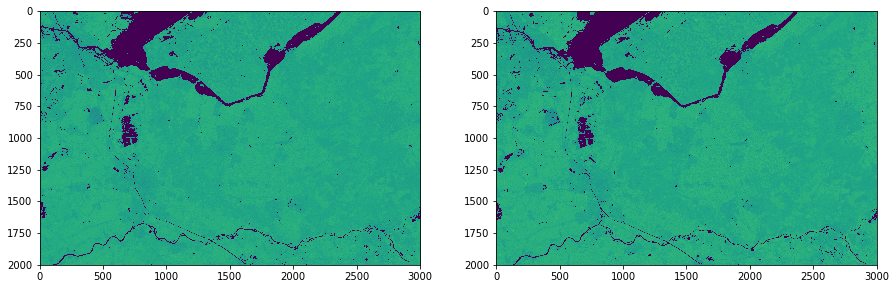

In [22]:
# The you can start to read the files and stack them together by calling their names
# You will use the 'for' loop to iterate over the names to read files
stack = np.array([])  # Empty array to store the stacked images
fig = plt.figure(figsize=(15,15))
for i in range(len(file_list)):
    img = np.load(file_list[i])  # Read each image file
    plt.subplot(1,2,i+1)
    plt.imshow(img)  # Each time, also check the size of the image
    
    # In order to do clustering, image should be reshaped into a single column
    img_col = img.reshape(-1, 1)
    
    # Each time put the reshaped image into the stack
    stack = np.hstack((stack,img_col)) if stack.size else img_col
    # Also to check the size of the stack
    print(stack.shape)


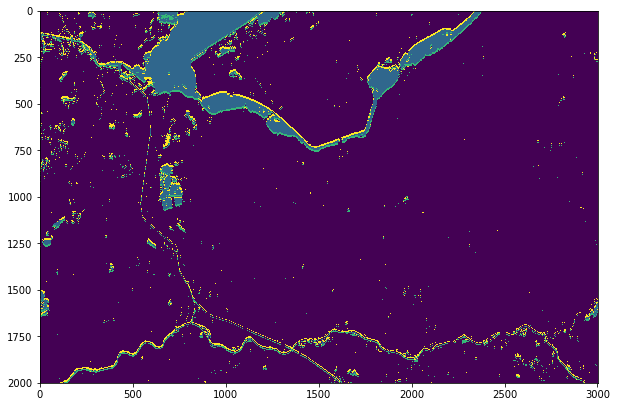

In [26]:
# Now, it's time for the Kmeans
# I start to call KMeans function from the sklearn cluster module
# I also choose an arbitrary number of clusters, I can of course change
# Important!! There are already many clustering algorithms other than KMeans in 'sklearn', you can try many things already by only using 'sklearn'
kmean_cluster = cluster.KMeans(n_clusters=4)  # This is a function to be fitted to the data
labels = kmean_cluster.fit_predict(stack)  # Fitting the data

# Visualization
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = img.shape  # Get the original dimensions of the image
plt.figure(figsize = (10,14))
plt.imshow(labels.reshape(row, col))


In [ ]:
# How do you interpret the result?
# How does it compare to the result of change detection?
# What else could you obtain if the number of clusters (the value k) changes?